In [1]:
import sys
from collections.abc import Sequence
sys.path.append("../")

import numpy as np
from matchms import Spectrum 
from matchms.importing import load_from_mgf
from sklearn.manifold import TSNE

from const import tsne_cluster
from utils import embedding

/data/xp/Anaconda/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set_style("whitegrid")
sns.set_palette("tab10")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

def tsne_plot(data, labels):
    figure, ax = plt.subplots(1, 1, dpi=300, figsize=(4, 3))
    sns.scatterplot(
        x=data[:, 0], 
        y=data[:, 1], 
        hue=labels, 
        ax=ax, 
        edgecolor='none', 
        s=10,
        alpha=0.7
    )
    ax.legend().remove()
    # ax.legend(bbox_to_anchor=(1.02, 0.5), ncol=1, loc="center left", frameon=False)
    figure.tight_layout()
    return figure

In [3]:
def get_labels(spectra: Sequence[Spectrum], smiles2compound: dict[str, str]):
    indices = []
    labels = []
    smiles_seq = list(smiles2compound.keys())
    for s in spectra:
        smiles = s.get("smiles")
        indices.append(smiles_seq.index(smiles))
        labels.append(smiles2compound[smiles])

    indices = np.array(indices)
    labels = np.array(labels)
    argsort_indices = np.argsort(indices)
    labels = labels[argsort_indices]
    return labels, argsort_indices

In [4]:
spectra, spectra_embdding = embedding(str(tsne_cluster.SPECEMBEDDING_TSNE_RAW))
smiles2compound = np.load("./specembedding_smiles2compound.npy", allow_pickle=True).item()
labels, argsort_indices = get_labels(spectra, smiles2compound)

tsne = TSNE()
spectra_embdding = tsne.fit_transform(spectra_embdding[argsort_indices, :])

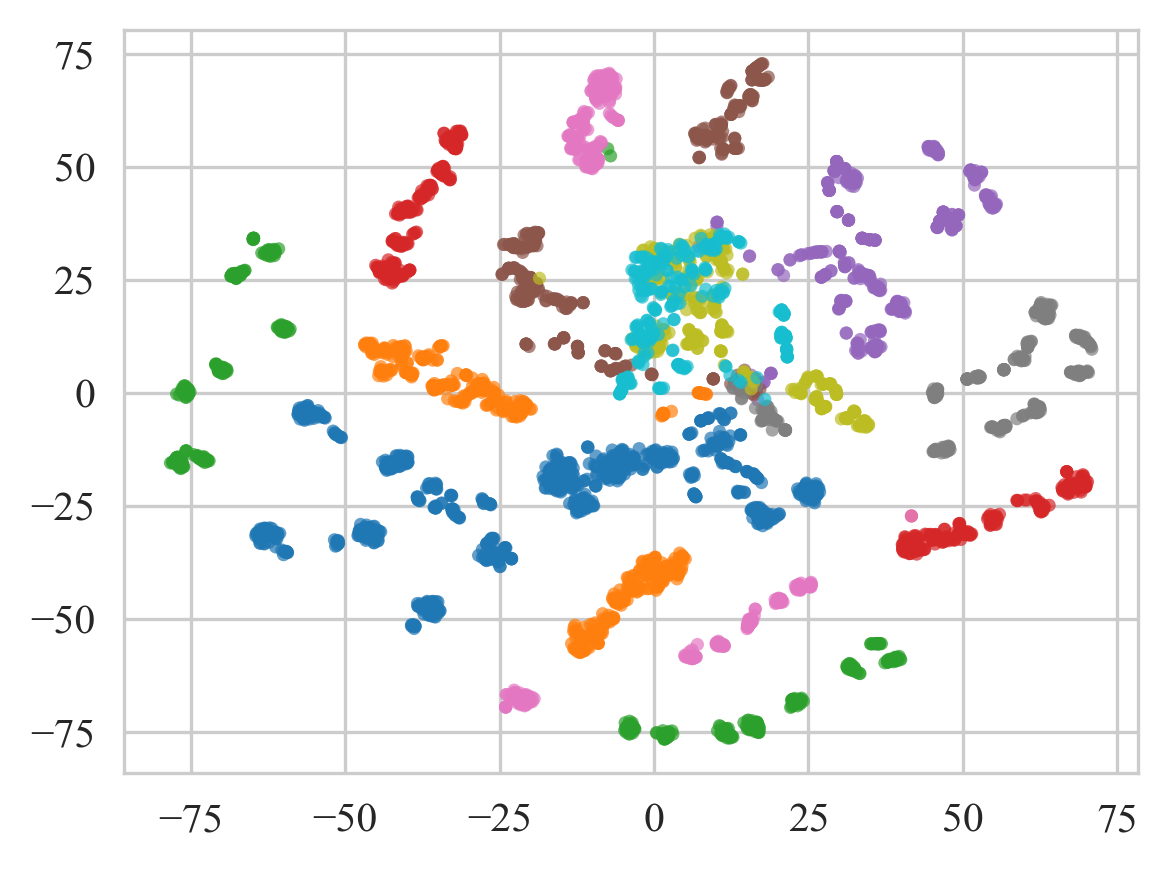

In [5]:
f_sm = tsne_plot(spectra_embdding, labels)

f_sm.savefig("./figures/tsne_sm.png", transparent=True, bbox_inches="tight")
f_sm.savefig("./figures/tsne_sm.svg", transparent=True, bbox_inches="tight")
f_sm.savefig("./figures/tsne_sm.pdf", transparent=True, bbox_inches="tight")

In [6]:
spectra, spectra_embdding = embedding(str(tsne_cluster.MSBERT_TSNE_RAW))
smiles2compound = np.load("./msbert_smiles2compound.npy", allow_pickle=True).item()
labels, argsort_indices = get_labels(spectra, smiles2compound)

tsne = TSNE()
spectra_embdding = tsne.fit_transform(spectra_embdding[argsort_indices, :])

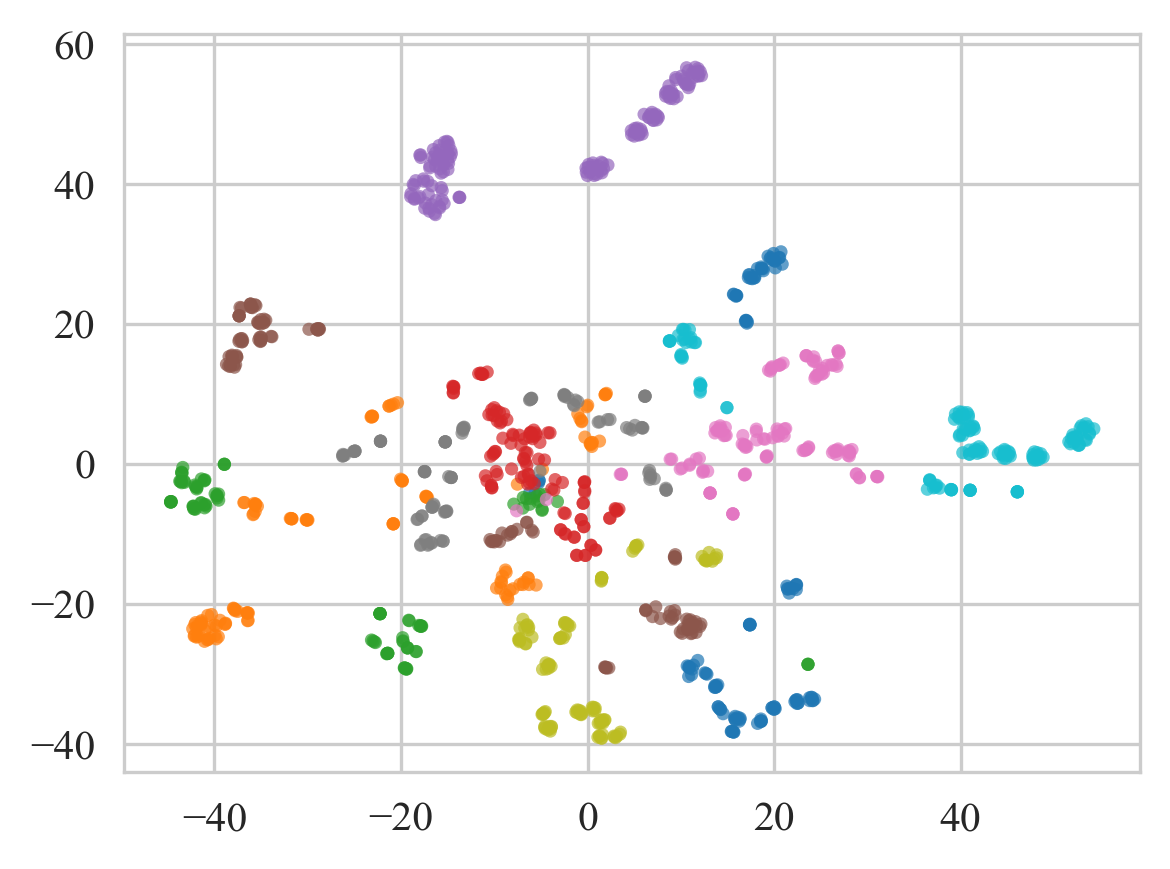

In [7]:
f_mb = tsne_plot(spectra_embdding, labels)

f_mb.savefig("./figures/tsne_mb.png", transparent=True, bbox_inches="tight")
f_mb.savefig("./figures/tsne_mb.svg", transparent=True, bbox_inches="tight")
f_mb.savefig("./figures/tsne_mb.pdf", transparent=True, bbox_inches="tight")